<a href="https://colab.research.google.com/github/josephtrill/CSST101_TRILLANA_BSCS-3A/blob/main/3A_TRILLANA_MP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Problem No. 4
### Machine Problem: Bayesian Network for Healthcare Diagnosis


### Exercise 1: Setting Up the Environment

In [1]:
#  Install Libraries:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.7 MB/s eta 0:00:00


In [2]:
# mport Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

### Exercise 2: Define the Bayesian Network Structure

In [37]:
from pgmpy.models import BayesianModel

# Define the structure of the Bayesian Network
model = BayesianModel([
    ('Age', 'HeartDisease'),
    ('Smoking', 'HeartDisease'),
    ('Exercise', 'HeartDisease'),
    ('Cholesterol', 'HeartDisease'),
    ('BloodPressure', 'HeartDisease'),
    ('HeartDisease', 'ChestPain'),
    ('HeartDisease', 'ECGResult')
])

print("Model edges:", model.edges())

Model edges: [('Age', 'HeartDisease'), ('HeartDisease', 'ChestPain'), ('HeartDisease', 'ECGResult'), ('Smoking', 'HeartDisease'), ('Exercise', 'HeartDisease'), ('Cholesterol', 'HeartDisease'), ('BloodPressure', 'HeartDisease')]


### Exercise 3: Define Conditional Probability Tables (CPTs)

In [38]:
from pgmpy.factors.discrete import TabularCPD

# Define the CPT for Heart Disease
cpd_heart_disease = TabularCPD(
    variable='HeartDisease',
    variable_card=2,
    values=[[0.8, 0.6, 0.7, 0.5, 0.4, 0.2, 0.3, 0.1,
             0.7, 0.5, 0.6, 0.4, 0.3, 0.2, 0.1, 0.9,
             0.9, 0.7, 0.8, 0.6, 0.5, 0.3, 0.4, 0.2,
             0.6, 0.4, 0.5, 0.3, 0.2, 0.1, 0.3, 0.8],
            [0.2, 0.4, 0.3, 0.5, 0.6, 0.8, 0.7, 0.9,
             0.3, 0.5, 0.4, 0.6, 0.7, 0.8, 0.9, 0.1,
             0.1, 0.3, 0.2, 0.4, 0.5, 0.7, 0.6, 0.8,
             0.4, 0.6, 0.5, 0.7, 0.8, 0.9, 0.7, 0.2]],
    evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'BloodPressure'],
    evidence_card=[2, 2, 2, 2, 2]
)


In [39]:
# Define the CPT for Chest Pain
cpd_chest_pain = TabularCPD(
    variable='ChestPain',
    variable_card=2,
    values=[[0.9, 0.3],
            [0.1, 0.7]],
    evidence=['HeartDisease'],
    evidence_card=[2]
)


In [22]:
# Define the CPT for ECG Result
cpd_ecg_result = TabularCPD(
    variable='ECGResult',
    variable_card=2,
    values=[[0.85, 0.4],
            [0.15, 0.6]],
    evidence=['HeartDisease'],
    evidence_card=[2]
)


### Exercise 4: Inference in the Bayesian Network

In [24]:
# Define CPTs for the independent variables
cpd_age = TabularCPD(variable='Age', variable_card=2, values=[[0.5], [0.5]])
cpd_smoking = TabularCPD(variable='Smoking', variable_card=2, values=[[0.4], [0.6]])
cpd_exercise = TabularCPD(variable='Exercise', variable_card=2, values=[[0.7], [0.3]])
cpd_cholesterol = TabularCPD(variable='Cholesterol', variable_card=2, values=[[0.6], [0.4]])
cpd_blood_pressure = TabularCPD(variable='BloodPressure', variable_card=2, values=[[0.55], [0.45]])


In [40]:
# Add all CPTs to the model
model.add_cpds(cpd_heart_disease, cpd_chest_pain, cpd_ecg_result,
               cpd_age, cpd_smoking, cpd_exercise, cpd_cholesterol, cpd_blood_pressure)

assert model.check_model(), "The model has errors."


In [26]:
# Initialize the inference object
infer = VariableElimination(model)


In [27]:
# Query for Heart Disease probability
query_result_heart_disease = infer.query(
    variables=['HeartDisease'],
    evidence={'Age': 1, 'Smoking': 1, 'Cholesterol': 1, 'BloodPressure': 1}
)

print(query_result_heart_disease)


+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.4500 |
+-----------------+---------------------+
| HeartDisease(1) |              0.5500 |
+-----------------+---------------------+


In [28]:
# Query for Abnormal ECG Result given Chest Pain
query_result_ecg = infer.query(
    variables=['ECGResult'],
    evidence={'ChestPain': 1}
)

print(query_result_ecg)


+--------------+------------------+
| ECGResult    |   phi(ECGResult) |
+==============+==================+
| ECGResult(0) |           0.4595 |
+--------------+------------------+
| ECGResult(1) |           0.5405 |
+--------------+------------------+


In [29]:
# Query for Heart Disease distribution given that the patient does not exercise
query_result_heart_disease_no_exercise = infer.query(
    variables=['HeartDisease'],
    evidence={'Exercise': 0}
)

print(query_result_heart_disease_no_exercise)


+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.6000 |
+-----------------+---------------------+
| HeartDisease(1) |              0.4000 |
+-----------------+---------------------+


### Exercise 5: Parameter Learning from Simulated Data

In [41]:
import numpy as np
import pandas as pd

# Set a random seed
np.random.seed(42)

# Define the number
n_samples = 1000

# Generate data for independent variables
age = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])
smoking = np.random.choice([0, 1], size=n_samples, p=[0.4, 0.6])
exercise = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])
cholesterol = np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])
blood_pressure = np.random.choice([0, 1], size=n_samples, p=[0.55, 0.45])


heart_disease = (0.2 * age + 0.3 * smoking + 0.1 * (1 - exercise) +
                 0.25 * cholesterol + 0.15 * blood_pressure)
heart_disease = (heart_disease + np.random.normal(0, 0.1, size=n_samples) > 0.5).astype(int)

# Chest Pain based on Heart Disease
chest_pain = (0.7 * heart_disease + np.random.normal(0, 0.1, size=n_samples) > 0.5).astype(int)

# ECG Result based on Heart Disease
ecg_result = (0.6 * heart_disease + np.random.normal(0, 0.1, size=n_samples) > 0.5).astype(int)

data = pd.DataFrame({
    'Age': age,
    'Smoking': smoking,
    'Exercise': exercise,
    'Cholesterol': cholesterol,
    'BloodPressure': blood_pressure,
    'HeartDisease': heart_disease,
    'ChestPain': chest_pain,
    'ECGResult': ecg_result
})

data.head()


,Age,Smoking,Exercise,Cholesterol,BloodPressure,HeartDisease,ChestPain,ECGResult
0,0,0,0,1,1,0,0,0
1,1,1,0,1,1,1,1,0
2,1,1,1,0,1,1,1,1
3,1,1,0,1,0,1,1,1
4,0,1,0,0,0,0,0,0


In [42]:
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork

# Define the network structure
model = BayesianNetwork([
    ('Age', 'HeartDisease'),
    ('Smoking', 'HeartDisease'),
    ('Exercise', 'HeartDisease'),
    ('Cholesterol', 'HeartDisease'),
    ('BloodPressure', 'HeartDisease'),
    ('HeartDisease', 'ChestPain'),
    ('HeartDisease', 'ECGResult')
])

model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
    print(cpd)


+--------+-------+
| Age(0) | 0.503 |
+--------+-------+
| Age(1) | 0.497 |
+--------+-------+
+-----------------+------------------+-----+------------------+------------------+
| Age             | Age(0)           | ... | Age(1)           | Age(1)           |
+-----------------+------------------+-----+------------------+------------------+
| BloodPressure   | BloodPressure(0) | ... | BloodPressure(1) | BloodPressure(1) |
+-----------------+------------------+-----+------------------+------------------+
| Cholesterol     | Cholesterol(0)   | ... | Cholesterol(1)   | Cholesterol(1)   |
+-----------------+------------------+-----+------------------+------------------+
| Exercise        | Exercise(0)      | ... | Exercise(1)      | Exercise(1)      |
+-----------------+------------------+-----+------------------+------------------+
| Smoking         | Smoking(0)       | ... | Smoking(0)       | Smoking(1)       |
+-----------------+------------------+-----+------------------+------------

### Exercise 6: Network Visualization and Analysis


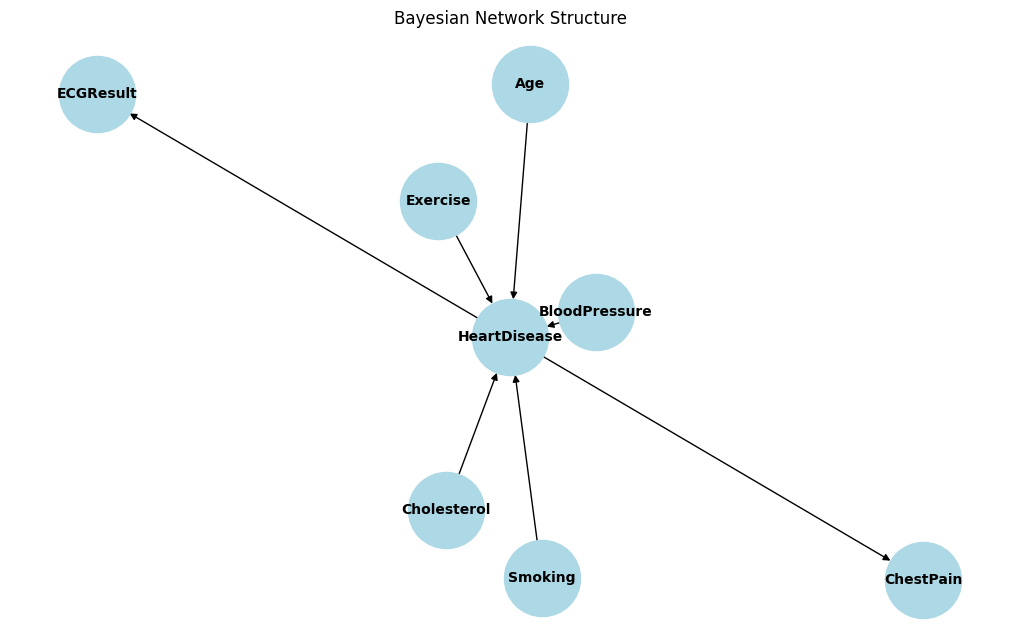

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

# graph from the Bayesian Network
G = nx.DiGraph()

edges = [
    ('Age', 'HeartDisease'),
    ('Smoking', 'HeartDisease'),
    ('Exercise', 'HeartDisease'),
    ('Cholesterol', 'HeartDisease'),
    ('BloodPressure', 'HeartDisease'),
    ('HeartDisease', 'ChestPain'),
    ('HeartDisease', 'ECGResult')
]
G.add_edges_from(edges)

# Draw the network
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): '' for u, v in edges}, font_color='red')
plt.title("Bayesian Network Structure")
plt.show()


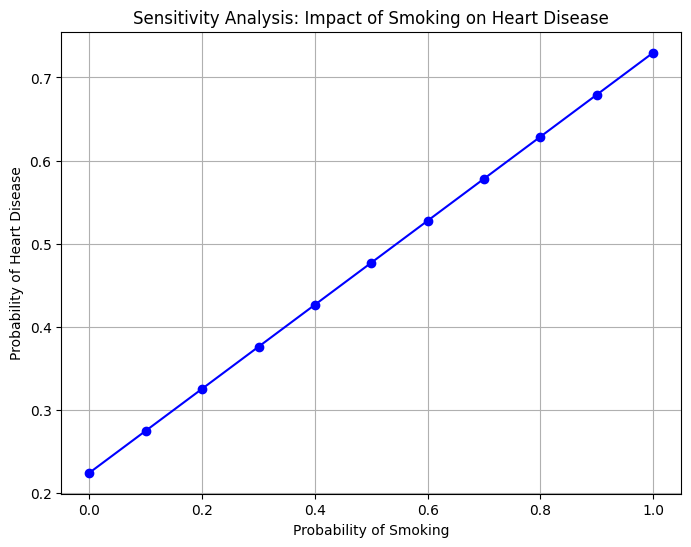

In [44]:
from pgmpy.inference import VariableElimination

# Initialize Variable Elimination for inference
infer = VariableElimination(model)

# Array to store probability values
smoking_probabilities = np.linspace(0, 1, 11)
heart_disease_likelihood = []

# Evaluate Heart Disease probability
for p in smoking_probabilities:

    cpd_smoking = TabularCPD(variable='Smoking', variable_card=2, values=[[1-p], [p]])
    model.add_cpds(cpd_smoking)

    # probability of Heart Disease
    query_result = infer.query(variables=['HeartDisease'], evidence={})
    heart_disease_likelihood.append(query_result.values[1])  # Store probability of Heart Disease = Yes

plt.figure(figsize=(8, 6))
plt.plot(smoking_probabilities, heart_disease_likelihood, marker='o', color='b')
plt.xlabel('Probability of Smoking')
plt.ylabel('Probability of Heart Disease')
plt.title('Sensitivity Analysis: Impact of Smoking on Heart Disease')
plt.grid(True)
plt.show()
